In [1]:
import pandas as pd
import numpy as np
import nltk
import random
import time
import string
import collections
import matplotlib.pyplot as plt
import calendar
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from copy import copy, deepcopy
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from pandas.tseries.offsets import *
from datetime import datetime
from calendar import monthrange
from dateutil import relativedelta
from datetime import datetime, timedelta
lmtzr=WordNetLemmatizer()

In [2]:
data_ads = "/Users/MaxTan/Documents/CU_16fall/BDA/Project/Data/"

In [3]:
user_raw = pd.read_csv(data_ads + "wow3_user2.csv", names = ["user_id", "review_count", "average_stars", 
                                               "friends", "fans", "votes_cool", "votes_funny", 
                                               "votes_useful", "num", "degree", "coefficient"])


In [4]:
business_raw = pd.read_csv(data_ads+"wow3_business_mysql.csv", names = ["business_id", "name", "latitude", 
                                                           "longitude", "stars", "categories", 
                                                           "review_count", "open"])

In [5]:
review_raw = pd.read_csv(data_ads+"wow3_review_mysql.csv", names = ["review_id", "user_id", "business_id", 
                                                       "stars", "text", "date", "votes_funny", 
                                                       "votes_useful"])

/Users/MaxTan/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
all_raw = pd.read_csv(data_ads+"wow3_all2.csv", names = ["business_id", 
                                                       "name", "stars_business","business_review_count",
                                                       "categories", "open", "review_id", 
                                                       "stars_review", "text", "date", "votes_funny", 
                                                       "votes_useful","user_id", "user_review_count", 
                                                       "average_stars","friends", "fans", "num", 
                                                       "degree", "coefficient"])


In [ ]:
#3. Business Rate Prediction(Time Series):
#Input: a given business_id
#Output: predicted result of next month's rate and model data visualization

In [142]:
#Choose a business ID to create a sub-data-frame:
temp_biz = collections.Counter(all_raw.business_id.values).most_common(10)[0][0]
print temp_biz

SsGNAc9U-aKPZccnaDtFkA


In [151]:
temp_biz = "-Mh44q324VW8mpxIdH_HPw"

73 73
Results of Dickey-Fuller Test:
Test Statistic                 -3.636123
p-value                         0.005107
#Lags Used                      0.000000
Number of Observations Used    26.000000
Critical Value (5%)            -2.981247
Critical Value (1%)            -3.711212
Critical Value (10%)           -2.630095
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -5.362940
p-value                         0.000004
#Lags Used                      4.000000
Number of Observations Used    56.000000
Critical Value (5%)            -2.914731
Critical Value (1%)            -3.552928
Critical Value (10%)           -2.595137
dtype: float64


/Users/MaxTan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/Users/MaxTan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:72: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/Users/MaxTan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:73: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


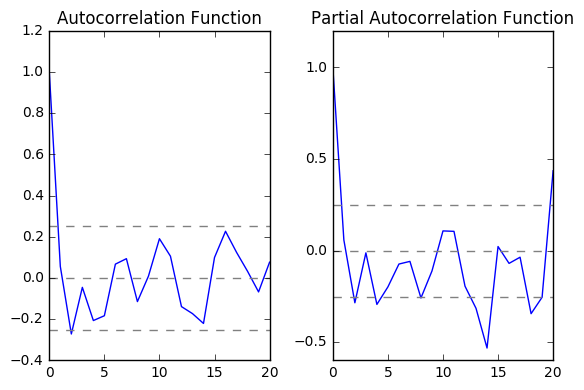

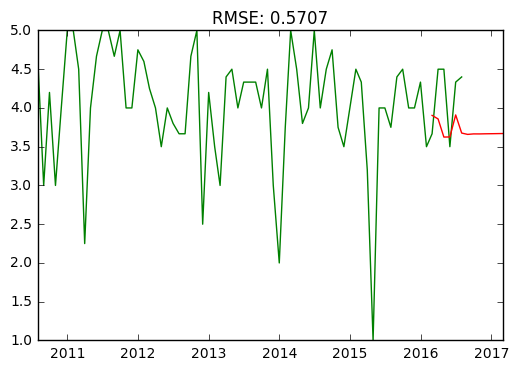

The true data is 
                rate
2010-07-31  4.666667
2010-08-31  3.000000
2010-09-30  4.200000
2010-10-31  3.000000
2010-11-30  4.000000
2010-12-31  5.000000
2011-01-31  5.000000
2011-02-28  4.500000
2011-03-31  2.250000
2011-04-30  4.000000
2011-05-31  4.666667
2011-06-30  5.000000
2011-07-31  5.000000
2011-08-31  4.666667
2011-09-30  5.000000
2011-10-31  4.000000
2011-11-30  4.000000
2011-12-31  4.750000
2012-01-31  4.600000
2012-02-29  4.250000
2012-03-31  4.000000
2012-04-30  3.500000
2012-05-31  4.000000
2012-06-30  3.800000
2012-07-31  3.666667
2012-08-31  3.666667
2012-09-30  4.666667
2012-10-31  5.000000
2012-11-30  2.500000
2012-12-31  4.200000
...              ...
2014-02-28  5.000000
2014-03-31  4.500000
2014-04-30  3.800000
2014-05-31  4.000000
2014-06-30  5.000000
2014-07-31  4.000000
2014-08-31  4.500000
2014-09-30  4.750000
2014-10-31  3.750000
2014-11-30  3.500000
2014-12-31  4.000000
2015-01-31  4.500000
2015-02-28  4.333333
2015-03-31  3.200000
2015-04-30  1.00

In [158]:
sub_biz = all_raw[all_raw['business_id']==temp_biz]
#print sub_biz.shape

if sub_biz.shape[0]<200:
    raise ValueError('could not find enough review data for %s' % temp_biz)
sub_biz.head(1)


dates = [datetime.strptime(date,'%Y-%m-%d') for date in sub_biz.date.values]
rate_predict = pd.DataFrame()
rate_predict['rate'] = pd.Series(sub_biz.stars_review.values,index = pd.Series(dates))

plt.plot_date(x=rate_predict.index.values, y=rate_predict.rate.values,fmt='r*')
plt.title('Rate Trend Prediction')
plt.ylabel('Rates')
plt.xlabel('Dates')
plt.grid(True)
#plt.show()
plt.close()


#Aggregation: group by month and take average
g = rate_predict.groupby(pd.TimeGrouper("M"))
rate_predict_avg = g.mean()
plt.plot_date(x=rate_predict_avg.index, y=rate_predict_avg.rate.values,fmt='b-')
plt.title('Rate Trend Prediction for Business:\n'+ temp_biz)
plt.ylabel('Rates')
plt.xlabel('Dates')
plt.grid(True)
#plt.show()
plt.close()


#print rate_predict_avg.shape
if rate_predict_avg.shape[0]<36:
    raise ValueError('could not find enough review data for %s' % temp_biz)
    
    
    
start = rate_predict_avg.index[0]
end = rate_predict_avg.index[-1]
#print start,end

def calculate_monthdelta(date1, date2):
    def is_last_day_of_the_month(date):
        days_in_month = calendar.monthrange(date.year, date.month)[1]
        return date.day == days_in_month
    imaginary_day_2 = 31 if is_last_day_of_the_month(date2) else date2.day
    monthdelta = (
        (date2.month - date1.month) +
        (date2.year - date1.year) * 12 +
        (-1 if date1.day > imaginary_day_2 else 0)
        )
    return monthdelta

print calculate_monthdelta(start,end)+1,rate_predict_avg.shape[0]




months = rate_predict_avg.shape[0]

#1.Rolling mean(Moving Average) of the monthly prediction:
moving_avg = pd.rolling_mean(rate_predict_avg,12)

rate_predict_moving_avg_diff = rate_predict_avg - moving_avg
#rate_predict_moving_avg_diff.head(13)


def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.grid(True)
    #plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries.values.ravel(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    
    
#Drop NA for Moving Average:
rate_predict_moving_avg_diff.dropna(inplace=True)
#Perform Stationarity Test:
test_stationarity(rate_predict_moving_avg_diff)


#3.Decomposition:

rate_predict_avg = rate_predict_avg.fillna(method = 'bfill')


decomposition = seasonal_decompose(rate_predict_avg)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

"""
plt.subplot(411)
plt.plot(rate_predict_avg, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
"""

rate_predict_decompose = residual
rate_predict_decompose.dropna(inplace=True)
test_stationarity(rate_predict_decompose)




lag_acf = acf(rate_predict_decompose, nlags=20)
lag_pacf = pacf(rate_predict_decompose, nlags=20, method='ols')


plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(rate_predict_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(rate_predict_decompose)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(rate_predict_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(rate_predict_decompose)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()


model = ARIMA(rate_predict_avg, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  

#common = list(set(results_AR.fittedvalues.index).intersection(set(rate_predict_decompose.index)))

plt.plot(rate_predict_decompose,color = 'green')
plt.plot(results_AR.fittedvalues, color = 'red')


#res = 0.0
#for i in range(len(common)):
#    res+=(rate_predict_decompose[rate_predict_decompose.index==common[i]].values[0][0] - results_AR.fittedvalues[results_AR.fittedvalues.index==common[i]].values[0])**2
#print res
#plt.title('RSS: %.4f'% res)

#plt.show()
plt.close()




predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
#print predictions_AR_diff.head()
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
#print predictions_AR_diff_cumsum.head()
predictions_AR = pd.Series(rate_predict_avg.values[0], index=rate_predict_avg.index)
predictions_AR = predictions_AR.add(predictions_AR_diff_cumsum,fill_value=0)
#predictions_AR.tail(3)

short_predict = results_AR.predict(start = months-6,end = months+6)
#print results_AR.predict(start_date.isoformat(), end_date.isoformat())
short_predict_AR_diff = pd.Series(short_predict, copy=True)
#print short_predict_AR_diff.head()
short_predict_AR_diff_cumsum = short_predict_AR_diff.cumsum()
#print short_predict_AR_diff_cumsum.head()


short_predict_AR = pd.Series(rate_predict_avg[rate_predict_avg.index==short_predict.index[0]].rate.values[0], index=short_predict.index)
short_predict_AR = short_predict_AR.add(short_predict_AR_diff_cumsum,fill_value=0)
#short_predict_AR


plt.plot(rate_predict_avg,color='green')
#plt.plot(predictions_AR,color='red')
plt.plot(short_predict_AR,color = 'red')

res = 0.0
n = len(short_predict_AR.iloc[:6].values)
for i in range(n):
    res +=(short_predict_AR.iloc[:6].values[i]-rate_predict_avg.iloc[-6:].values[i])**2
res/=n
RMSE = np.sqrt(res[0])

plt.title('RMSE: %.4f'% RMSE)
plt.show()
plt.close()


print "The true data is "
print rate_predict_avg

print "The predicted data is"
print short_predict

In [153]:
print results_AR.summary()

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                   72
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -95.281
Method:                       css-mle   S.D. of innovations              0.908
Date:                Mon, 19 Dec 2016   AIC                            196.562
Time:                        17:10:41   BIC                            203.392
Sample:                    08-31-2010   HQIC                           199.281
                         - 07-31-2016                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            0.0012      0.084      0.014      0.989        -0.163     0.165
ar.L1.D.rate    -0.2827      0.115     -2.465      0.016        -0.508    -0.058
                                    Roots   

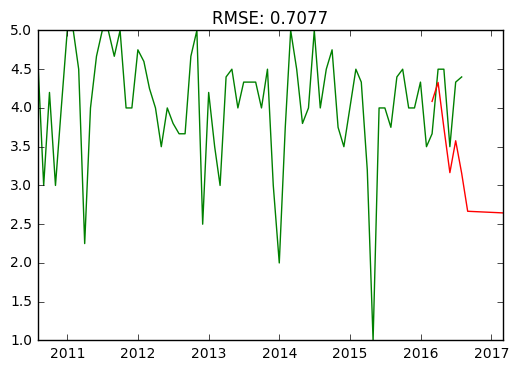

In [154]:
model = ARIMA(rate_predict_avg, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  

#common = list(set(results_MA.fittedvalues.index).intersection(set(rate_predict_decompose.index)))

plt.plot(rate_predict_decompose,color = 'green')
plt.plot(results_MA.fittedvalues, color = 'red')


#res = 0.0
#for i in range(len(common)):
#    res+=(rate_predict_decompose[rate_predict_decompose.index==common[i]].values[0][0] - results_MA.fittedvalues[results_MA.fittedvalues.index==common[i]].values[0])**2
#print res
#plt.title('RSS: %.4f'% res)

#plt.show()
plt.close()




predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
#print predictions_MA_diff.head()
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
#print predictions_MA_diff_cumsum.head()
predictions_MA = pd.Series(rate_predict_avg.values[0], index=rate_predict_avg.index)
predictions_MA = predictions_MA.add(predictions_MA_diff_cumsum,fill_value=0)
#predictions_MA.tail(3)

short_predict = results_MA.predict(start = months-6,end = months+6)
#print results_MA.predict(start_date.isoformat(), end_date.isoformat())
short_predict_MA_diff = pd.Series(short_predict, copy=True)
#print short_predict_MA_diff.head()
short_predict_MA_diff_cumsum = short_predict_MA_diff.cumsum()
#print short_predict_MA_diff_cumsum.head()


short_predict_MA = pd.Series(rate_predict_avg[rate_predict_avg.index==short_predict.index[0]].rate.values[0], index=short_predict.index)
short_predict_MA = short_predict_MA.add(short_predict_MA_diff_cumsum,fill_value=0)
#short_predict_MA


plt.plot(rate_predict_avg,color='green')
#plt.plot(predictions_MA,color='red')
plt.plot(short_predict_MA,color = 'red')

res = 0.0
n = len(short_predict_MA.iloc[:6].values)
for i in range(n):
    res +=(short_predict_MA.iloc[:6].values[i]-rate_predict_avg.iloc[-6:].values[i])**2
res/=n
RMSE = np.sqrt(res[0])

plt.title('RMSE: %.4f'% RMSE)
plt.show()
plt.close()

In [155]:
print results_MA.summary()

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                   72
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -82.278
Method:                       css-mle   S.D. of innovations              0.736
Date:                Mon, 19 Dec 2016   AIC                            170.556
Time:                        17:10:52   BIC                            177.386
Sample:                    08-31-2010   HQIC                           173.275
                         - 07-31-2016                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.0035      0.004     -0.860      0.393        -0.012     0.005
ma.L1.D.rate    -1.0000      0.040    -25.283      0.000        -1.078    -0.922
                                    Roots   

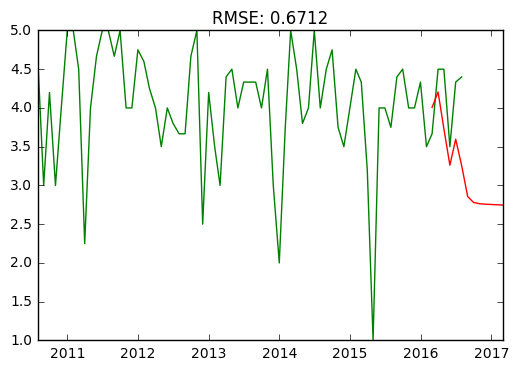

In [156]:
model = ARIMA(rate_predict_avg, order=(1, 1, 1))  

results_ARMA = model.fit(disp=-1)  

#common = list(set(results_ARMA.fittedvalues.index).intersection(set(rate_predict_decompose.index)))

plt.plot(rate_predict_decompose,color = 'green')
plt.plot(results_ARMA.fittedvalues, color = 'red')


#res = 0.0
#for i in range(len(common)):
#    res+=(rate_predict_decompose[rate_predict_decompose.index==common[i]].values[0][0] - results_ARMA.fittedvalues[results_ARMA.fittedvalues.index==common[i]].values[0])**2
#print res
#plt.title('RSS: %.4f'% res)

#plt.show()
plt.close()




predictions_ARMA_diff = pd.Series(results_ARMA.fittedvalues, copy=True)
#print predictions_ARMA_diff.head()
predictions_ARMA_diff_cumsum = predictions_ARMA_diff.cumsum()
#print predictions_ARMA_diff_cumsum.head()
predictions_ARMA = pd.Series(rate_predict_avg.values[0], index=rate_predict_avg.index)
predictions_ARMA = predictions_ARMA.add(predictions_ARMA_diff_cumsum,fill_value=0)
#predictions_ARMA.tail(3)

short_predict = results_ARMA.predict(start = months-6,end = months+6)
#print results_ARMA.predict(start_date.isoformat(), end_date.isoformat())
short_predict_ARMA_diff = pd.Series(short_predict, copy=True)
#print short_predict_ARMA_diff.head()
short_predict_ARMA_diff_cumsum = short_predict_ARMA_diff.cumsum()
#print short_predict_ARMA_diff_cumsum.head()


short_predict_ARMA = pd.Series(rate_predict_avg[rate_predict_avg.index==short_predict.index[0]].rate.values[0], index=short_predict.index)
short_predict_ARMA = short_predict_ARMA.add(short_predict_ARMA_diff_cumsum,fill_value=0)
#short_predict_ARMA


plt.plot(rate_predict_avg,color='green')
#plt.plot(predictions_ARMA,color='red')
plt.plot(short_predict_ARMA,color = 'red')

res = 0.0
n = len(short_predict_ARMA.iloc[:6].values)
for i in range(n):
    res +=(short_predict_ARMA.iloc[:6].values[i]-rate_predict_avg.iloc[-6:].values[i])**2
res/=n
RMSE = np.sqrt(res[0])

plt.title('RMSE: %.4f'% RMSE)
plt.show()
plt.close()

In [157]:
print results_ARMA.summary()

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -81.054
Method:                       css-mle   S.D. of innovations              0.726
Date:                Mon, 19 Dec 2016   AIC                            170.109
Time:                        17:10:58   BIC                            179.215
Sample:                    08-31-2010   HQIC                           173.734
                         - 07-31-2016                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.0035      0.005     -0.719      0.475        -0.013     0.006
ar.L1.D.rate     0.1843      0.117      1.572      0.120        -0.045     0.414
ma.L1.D.rate    -0.9999      0.038    -26.64